<a href="https://colab.research.google.com/github/SoonchanGwon/FB_Prophet/blob/main/01_%EA%B0%9C%EB%B0%9C%ED%99%98%EA%B2%BD%ED%99%95%EC%9D%B8(ict36)_%26_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%98%88%EC%B8%A1_%EB%B6%84%EC%84%9D(fbprophet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석, 시각화, 예측 라이브러리 불러오기
<!--
# 라이브러리 설치 #
(ict36) PS C:\worksp> conda install pandas
(ict36) PS C:\worksp> conda install numpy
(ict36) PS C:\worksp> conda install matplotlib
(ict36) PS C:\worksp> conda install beauitfulsoup4

(ict36) PS C:\worksp> conda install –c conda-forge fbprophet
(ict36) PS C:\worksp> conda install –c conda-forge pystan
(ict36) PS C:\worksp> conda install plotly
-->

In [1]:
# 판다스, 넘파이, 맷플롭립, 뷰티풀숲, 플로틀리 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

import plotly.graph_objs as go
import plotly.offline as py

In [2]:
# 시계열 예측 라이브러리 
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

# 데이터 수집 및 읽기

* https://www.kaggle.com/thaile1001/corona0221202
* 코로나19 전세계 지역별 확진자, 회복자, 사망자 데이터

In [47]:
# 데이터 읽기 
url = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv'
df = pd.read_csv(url, error_bad_lines=False)

# df = pd.read_csv('./02-21-2020.csv')
df.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0


In [48]:
# 한국 확진자수 데이터 추출
df_korea = df[df['Country/Region'] == 'Korea, South']
df_korea.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
48356,2020-01-22,"Korea, South",NaN,1,0.0,0
48357,2020-01-23,"Korea, South",NaN,1,0.0,0
48358,2020-01-24,"Korea, South",NaN,2,0.0,0
48359,2020-01-25,"Korea, South",NaN,2,0.0,0
48360,2020-01-26,"Korea, South",NaN,3,0.0,0


In [49]:
# 한국 확진자수 데이터프레임 생성
df_korea1 = df_korea.T[4:]
df_korea1.head()

,48356,48357,48358,48359,48360,48361,48362,48363,48364,48365,48366,48367,48368,48369,48370,48371,48372,48373,48374,48375,48376,48377,48378,48379,48380,48381,48382,48383,48384,48385,48386,48387,48388,48389,48390,48391,48392,48393,48394,48395,...,48624,48625,48626,48627,48628,48629,48630,48631,48632,48633,48634,48635,48636,48637,48638,48639,48640,48641,48642,48643,48644,48645,48646,48647,48648,48649,48650,48651,48652,48653,48654,48655,48656,48657,48658,48659,48660,48661,48662,48663
Recovered,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,3,3,7,7,7,9,9,10,12,12,16,16,16,18,18,22,22,22,22,27,30,...,23258,23312,23368,23466,23584,23647,23717,23834,23869,23905,23981,24073,24168,24227,24311,24357,24395,24510,24616,24735,24821,24910,24968,25029,25160,25266,25404,25537,25636,25691,25759,25860,25973,26098,26263,26365,26466,26539,26722,26825
Deaths,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,6,8,10,12,13,13,16,17,...,443,444,444,447,450,453,455,457,457,457,460,461,462,463,464,466,468,472,474,475,476,477,478,480,485,487,487,488,492,493,494,494,496,498,501,503,505,509,510,513


In [50]:
# 한국의 확진자 시계열 데이터
# df_korea = df_korea.reset_index().rename(columns={'index': 'Date', 33: 'Confirmed'})
# df_korea['Date'] = pd.to_datetime(df_korea['Date'])

# # 데이터 추가할 경우
# df_korea = df_korea.append([
#     {'date': pd.to_datetime('2020-11-25'), 'confirmed': 433},
#     {'date': pd.to_datetime('2020-11-26'), 'confirmed': 602},
#     ], ignore_index=True)

df_korea.tail()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
48659,2020-11-20,"Korea, South",NaN,30403,26365.0,503
48660,2020-11-21,"Korea, South",NaN,30733,26466.0,505
48661,2020-11-22,"Korea, South",NaN,31004,26539.0,509
48662,2020-11-23,"Korea, South",NaN,31353,26722.0,510
48663,2020-11-24,"Korea, South",NaN,31735,26825.0,513


# Plotly 데이터 시각화
(참고) https://wooiljeong.github.io/python/python_plotly/

In [51]:
# 한국 코로나 확진자 그래프
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=df_korea.Date,
        y=df_korea.Confirmed        
    )
)
fig

# Prophet 예측 분석

In [52]:
# Facebook Prophet 예측 모델 데이터프레임 생성
# 날짜 -> ds, data -> y
df_prophet = df_korea.rename(columns={
    'Date': 'ds',
    'Confirmed': 'y'
})

df_prophet.tail()

,ds,Country/Region,Province/State,y,Recovered,Deaths
48659,2020-11-20,"Korea, South",NaN,30403,26365.0,503
48660,2020-11-21,"Korea, South",NaN,30733,26466.0,505
48661,2020-11-22,"Korea, South",NaN,31004,26539.0,509
48662,2020-11-23,"Korea, South",NaN,31353,26722.0,510
48663,2020-11-24,"Korea, South",NaN,31735,26825.0,513


# Prophet 예측 모델 생성(1)

In [53]:
# Prophet 모델 

m = Prophet(  
    yearly_seasonality=False,   # 연별 분석
    weekly_seasonality=False,   # 주별 분석 
    daily_seasonality=True,     # 일별 분석
    seasonality_mode='additive' # 누적
)

# 모델 학습
m.fit(df_prophet)

# 예측 구간
future = m.make_future_dataframe(periods=7)
future.tail(7)


INFO:numexpr.utils:NumExpr defaulting to 2 threads.


,ds
308,2020-11-25
309,2020-11-26
310,2020-11-27
311,2020-11-28
312,2020-11-29
313,2020-11-30
314,2020-12-01


In [54]:
# 예측 분석
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7) # 날짜, 예측값, 오차 예측 최소값, 오차 예측 최대값

,ds,yhat,yhat_lower,yhat_upper
308,2020-11-25,29834.806172,29375.812363,30266.047188
309,2020-11-26,29942.682731,29495.226093,30407.821418
310,2020-11-27,30050.559291,29607.835796,30478.312299
311,2020-11-28,30158.435850,29651.348669,30576.758176
312,2020-11-29,30266.312409,29760.672649,30725.758211
313,2020-11-30,30374.188968,29907.422459,30853.718216
314,2020-12-01,30482.065528,29963.942611,30948.116403


In [55]:
# 그래프
fig = plot_plotly(m, forecast)
py.iplot(fig)

# Prophet 예측 모델 생성 (2)
- 체인지포인트 추가
- (참고사이트1) https://hyperconnect.github.io/2020/03/09/prophet-package.html
- (참고사이트2) https://facebook.github.io/prophet/docs/trend_changepoints.html

In [56]:
# Prophet 모델 

m = Prophet(
    changepoint_prior_scale=0.2, # 디폴트값 = 0.05
    changepoint_range=0.98,      
    yearly_seasonality=False,   
    weekly_seasonality=False,    
    daily_seasonality=True,     
    seasonality_mode='additive' 
)
# 모델 학습
m.fit(df_prophet)

# 예측 구간
future = m.make_future_dataframe(periods=7)
future.tail(7)

# 예측 분석
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7) 

# 그래프
fig = plot_plotly(m, forecast)
py.iplot(fig)

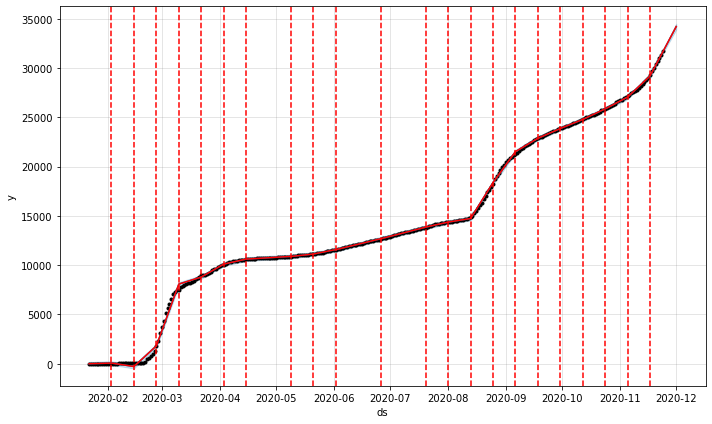

In [57]:
# 체인지 포인트 그래프
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)